# Customer_Segmentation - Data Wrangling 
##### Lindsey Robertson

### Problem

Customer segmentation for the purpose of Customer Lifetime Value prediction and more targeted marketing efforts. 

### Data

This real-world customer dataset with 31 variables describes
83,590 instances (customers) from a hotel in Lisbon, Portugal.
Instances include; customer personal, behavioral,
demographic, and geographical information for 3 full years.
The dataset can be found on Kaggle [here].(https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset)

Kaggle dataset origin, domain assumptions and data collection information: 

Nuno Antonio, Ana de Almeida, Luis Nunes. A hotel's customer's personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015-2018). Data in Brief 33(2020)106583, 24(November), 2020. URL: https://www.sciencedirect.com/journal/data-in-brief.


### Data Assumptions

* Some hotels have a policy of creating a profile for each guest companion(adult or children) only in particular cases and with authorization at times. 
* Typically a customer profile is created by one of three things:
    - customer's first checked-out at the hotel
    - customer's first cancelation
    - customer's first no-show
* Sometimes there are more than one profile for the same customer
* Only after the customer's first stay can hotels confirm the guest's personal details, such as nationality.

### Process

1) [Import needed libraries](#Import-libraries)

2) [Load data from Kaggle API](#Load-data-from-Kaggle-API)

3) [Read data as pandas dataframe](#read-data-into-dataframe)

4) [View data, observation sizes, data types and column contents](#read-data-into-dataframe)

5) [Look for duplicates](#duplicates)

6) [Check for validity and quality in features](#validity-checks-on-relevant-numerical-features)

    - [Impute illogical age values to zero](#impute-impossible-age-values-to-zero)

    - [Impute 24% data with zero revenue values if ever "CheckedIn"](#impute-zero-revenue-values)

7) [Look for missing values in dataframe](#find-the-missing-values-from-each-column)

    - [Impute missing age values](#handle-missing-age-values)
    
8) [Observe outliers in dataset](#outliers) 

### Import libraries

In [ ]:
pip install openpyxl

In [ ]:
pip install kaggle

In [ ]:
pip install opendatasets

In [204]:
import pandas as pd
import numpy as np
import opendatasets as od
from numpy import NaN
import seaborn as sns

### Load Flatfile Data

data = pd.read_excel('../Customer_Segmentation/data/raw/HotelCustomersDataset.xlsx')

### Load data from Kaggle API

In [168]:
od.download(
    "https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset")

Skipping, found downloaded files in ".\a-hotels-customers-dataset" (use force=True to force download)


### Read data into dataframe

In [169]:
file =('a-hotels-customers-dataset/\HotelCustomersDataset.xlsx')
Data = pd.read_excel(file)

 
# displaying the contents of the XLSX file
Data.head()


,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


How much of what kind of data do we have?

In [170]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    83590 non-null  int64  
 1   Nationality           83590 non-null  object 
 2   Age                   79811 non-null  float64
 3   DaysSinceCreation     83590 non-null  int64  
 4   NameHash              83590 non-null  object 
 5   DocIDHash             83590 non-null  object 
 6   AverageLeadTime       83590 non-null  int64  
 7   LodgingRevenue        83590 non-null  float64
 8   OtherRevenue          83590 non-null  float64
 9   BookingsCanceled      83590 non-null  int64  
 10  BookingsNoShowed      83590 non-null  int64  
 11  BookingsCheckedIn     83590 non-null  int64  
 12  PersonsNights         83590 non-null  int64  
 13  RoomNights            83590 non-null  int64  
 14  DaysSinceLastStay     83590 non-null  int64  
 15  DaysSinceFirstStay 

### Duplicates

Are all entries for uniques customers?

In [171]:
Data['ID'].nunique()



83590

Yes, all instances in the data are from unique customers.

What do the unique values look like for the rest of the features?

In [172]:
print(Data.nunique())

ID                      83590
Nationality               188
Age                       105
DaysSinceCreation        1095
NameHash                80642
DocIDHash               76993
AverageLeadTime           418
LodgingRevenue          10257
OtherRevenue             4490
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          29
PersonsNights              56
RoomNights                 48
DaysSinceLastStay        1105
DaysSinceFirstStay       1108
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64


*Quesiton from observation:
  Why is there a different amoutn of NameHash vs IDs? The NameHash is the name of the customer's hash string. I don't fully understand this feature but I believe the NameHash is standardized name processing. Since there are no missing values in the column, could this mean that some customers have created more than one customer ID or account somehow?

Check for duplicates in dataframe

In [173]:
Data.duplicated().sum()

0

We have confirmed we do not need to worry abou dupliate instances in our dataset. 

### Find the missing values from each column

In [174]:
print(Data.isnull().sum())

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64


We are  missing about 5% of the ages in our data to impute to zero along with the impossible ages. All other columns are free of missing values. Thankfully!

### Handle missing age values

Fill missing values with 0. Will explore further in EDA the implications of creating a large number of zero values noting that 0 means missing value. I used this instead of NaN to make the feature more consumable for modeling and analysis. 

In [175]:
print(Data['Age'].fillna(0))

0        51.0
1         0.0
2        31.0
3        60.0
4        51.0
         ... 
83585    54.0
83586    47.0
83587    53.0
83588    85.0
83589    13.0
Name: Age, Length: 83590, dtype: float64


### Validity checks on relevant numerical features

#### Age

In [176]:
correct_ages = Data['Age'].between(0, 110,inclusive=True).sum()

print(correct_ages)

79788


C:\Users\Lindsey\AppData\Local\Temp\ipykernel_29940\3805373336.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  correct_ages = Data['Age'].between(0, 110,inclusive=True).sum()


Select rows where age column contains any value under 0 or over 100. These ages are either illogical or highly unlikely. A person with the age 0 could be a baby, yet this is speculation. 

In [177]:
agefilter1 = ((Data['Age']>=100)).sum()
print(agefilter1)

8


In [178]:
 agefilter2 = ((Data['Age']<0)).sum()
 print(agefilter2)

17


In [179]:
agefilter3 = (((Data['Age']>=100))|((Data['Age']<0))).value_counts()
print(agefilter3)

False    83565
True        25
Name: Age, dtype: int64


<AxesSubplot:>

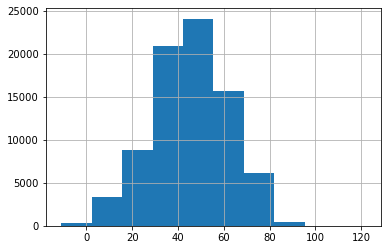

In [180]:
Data.Age.hist()

In [181]:
Data.loc[Data['Age'] < 0] 

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
2053,2054,BIH,-7.0,1034,0x816353557EFCF6A1E3FF64F3D652A18AE9F7EC0011E3...,0xE2B44FF02C72B0234AFA04D4BA9C7889491F302A9963...,0,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
2469,2470,ATF,-7.0,1029,0x05640BCB4A2D55CFDB6FB9615FD588A68C333119BC5F...,0x169E79749C1DD48C3510BEDBC69DD0DC9E0BDEF72B9C...,0,0.00,0.00,0,...,0,0,0,0,0,0,0,0,0,0
5128,5129,FRA,-9.0,981,0x6471098D9873D3D9CE70D2456C07F63B3359B270A5DE...,0x28EE0D2DD37EC913224737D542F8B9B6F30794306710...,66,93.30,14.00,0,...,0,0,0,0,1,0,0,0,0,0
6751,6752,GBR,-11.0,953,0xDB672419DADD95C4603D3210DCD2722B008DEBD1C69F...,0xB8599D349F3951EF4D29B6F03E4EB0E22ADEC4105246...,22,450.00,18.00,0,...,0,0,0,0,1,0,0,0,0,0
8360,8361,DEU,-7.0,927,0x72A31262A688A38B139A9914054C3BEFF00BC4C4DE8C...,0x539E60160A1B4C94C61F0066A4F784C2BB6570181BF3...,256,126.00,109.00,0,...,0,0,0,0,0,1,0,0,0,0
8628,8629,NLD,-10.0,923,0xF5C3782374B119A5B043FFE67A40DF8D7C8DD9FA66BB...,0xB0B8AE3BFF0FFAF09432A12D497EEFB52EB855BFE553...,111,414.60,34.00,0,...,0,0,0,0,1,0,0,0,0,0
9919,9920,DZA,-6.0,903,0x8106B7FC258F07571A74AAC617DA57DFB039C4E07116...,0xCACE52DD1FFE1D9AC33DCA72A6D532DC4EDEB132294C...,54,138.93,29.50,0,...,0,0,0,0,1,0,0,0,0,0
10662,10663,DEU,-10.0,891,0x77AF5AA2214FAAC110FCAA4BF988531CCF9742848A02...,0x4AFD6241BBBC6116AB5310415050347D9353661E23BC...,292,126.00,113.00,0,...,0,0,0,0,0,0,0,0,0,0
10694,10695,DEU,-10.0,891,0x89B606A6E3FD4FBA4AA9FD5D3E552261DB8CC434F8E4...,0xD50637C1BADB59272CC168B25157C49E0E7BB82B3373...,292,128.00,57.50,0,...,0,0,0,0,0,0,0,0,0,0
10755,10756,PRT,-6.0,891,0x6EC142C9678B27CE57B89FD994C644FB677675808B85...,0x3DD8D41B549A2D69E46516A021E0294C0A7477E73C56...,292,128.00,55.00,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
Data.loc[Data['Age'] > 100] 

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
3282,3283,PRT,114.0,1015,0xD38D7A36180C13A0574D7519E1494B8E2EAC72621A6D...,0xCF11B7A6F80F424EDB78D3FF8352233D36F6F511F9B6...,22,79.0,25.5,0,...,0,0,0,0,1,0,0,0,0,0
18910,18911,BEL,110.0,768,0x6152D1F1D09B9CC7D2FF30569EF3B1929722B4E6EA77...,0xE1C79C2BF9A49CDB7F3C309FDEE683B7C10DBBBFFFBC...,215,140.0,164.8,0,...,0,0,0,0,0,0,0,0,0,0
25587,25588,DEU,113.0,634,0x7288D12D383C94B2D140A2045711DD48205EF14F389D...,0x2907579A969DD1DD4BE224AB6B7D0F709AE9A38FBE69...,7,492.0,76.4,0,...,0,0,0,0,0,0,0,0,0,0
44518,44519,DEU,113.0,337,0x63FB7ADFA66ED7DC0ACC4CC82D0FF9F917A358514E49...,0x77C5E755CC76FED9DCAB1C593112EE2BEF92974D3699...,7,234.0,34.5,0,...,0,0,0,0,1,0,0,0,0,0
45082,45083,PRT,114.0,330,0x4C59FE6EA7DE0C51431EF8B6F650717835FB094E00AB...,0x32A503C87CCC773E24E3A9B6B1348A5CE6BF5866E0C6...,2,266.0,43.0,0,...,0,0,0,0,1,0,0,0,0,0
53284,53285,ITA,122.0,253,0xE03325073EB006F0486B5D31DDBE755ACCA2E25EBF6F...,0x3857EEF67D85FED04558802533FE4045E4E435401FF1...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
58036,58037,AUT,113.0,213,0xC00F5FF79E457FCD954A52BC4D32B183551563B74950...,0x78CFDBB1FE8B477F39FBF5AAE40712F99693C3285D86...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
64239,64240,ESP,109.0,166,0x3848AD55933C18BA90FD1AF5B651B24B885C2EFCA96C...,0xFE6FC9FF89118BB8DE3D0076D6ECBE69724465B0DCD1...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [183]:
wrong_ages = Data.loc[(Data['Age'] > 100) | (Data['Age'] < 0) ,['ID','Age', 'DaysSinceCreation', 'LodgingRevenue', 'OtherRevenue']]
print(wrong_ages)

wrong_ages.dtypes

          ID    Age  DaysSinceCreation  LodgingRevenue  OtherRevenue
2053    2054   -7.0               1034            0.00          0.00
2469    2470   -7.0               1029            0.00          0.00
3282    3283  114.0               1015           79.00         25.50
5128    5129   -9.0                981           93.30         14.00
6751    6752  -11.0                953          450.00         18.00
8360    8361   -7.0                927          126.00        109.00
8628    8629  -10.0                923          414.60         34.00
9919    9920   -6.0                903          138.93         29.50
10662  10663  -10.0                891          126.00        113.00
10694  10695  -10.0                891          128.00         57.50
10755  10756   -6.0                891          128.00         55.00
14321  14322  -10.0                837          128.00         53.00
14687  14688   -1.0                832          330.00        131.00
15104  15105  -11.0               

ID                     int64
Age                  float64
DaysSinceCreation      int64
LodgingRevenue       float64
OtherRevenue         float64
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

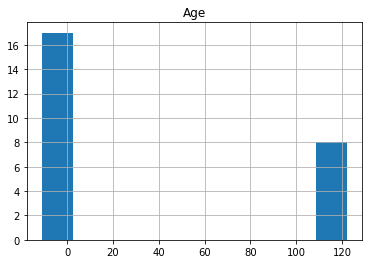

In [184]:
wrong_ages.hist('Age')

#### Impute impossible age values to zero

In [185]:
wrong_ages.loc[wrong_ages['Age'] > 100, 'Age'] = 0

wrong_ages.loc[wrong_ages['Age'] < 0, 'Age'] = 0


wrong_ages


,ID,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue
2053,2054,0.0,1034,0.00,0.00
2469,2470,0.0,1029,0.00,0.00
3282,3283,0.0,1015,79.00,25.50
5128,5129,0.0,981,93.30,14.00
6751,6752,0.0,953,450.00,18.00
8360,8361,0.0,927,126.00,109.00
8628,8629,0.0,923,414.60,34.00
9919,9920,0.0,903,138.93,29.50
10662,10663,0.0,891,126.00,113.00
10694,10695,0.0,891,128.00,57.50


In [ ]:
Data.loc[(Data['Age'] > 100) | (Data['Age'] < 0) ,['ID','Age', 'DaysSinceCreation', 'LodgingRevenue', 'OtherRevenue']]

In [201]:
Data.loc[Data['Age'] > 100, 'Age'] = 0

Data.loc[Data['Age'] < 0, 'Age'] = 0


wrong_ages

,ID,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue
2053,2054,0.0,1034,0.00,0.00
2469,2470,0.0,1029,0.00,0.00
3282,3283,0.0,1015,79.00,25.50
5128,5129,0.0,981,93.30,14.00
6751,6752,0.0,953,450.00,18.00
8360,8361,0.0,927,126.00,109.00
8628,8629,0.0,923,414.60,34.00
9919,9920,0.0,903,138.93,29.50
10662,10663,0.0,891,126.00,113.00
10694,10695,0.0,891,128.00,57.50


#### Revenues

Making sure all reported revenues are positive. 

In [186]:
revenuefilter1 = ((Data['LodgingRevenue']<=0)).value_counts()
print(revenuefilter1)

False    63182
True     20408
Name: LodgingRevenue, dtype: int64


In [187]:
revenuefilter2 = ((Data['OtherRevenue']<=0)).value_counts()
print(revenuefilter2)

False    63376
True     20214
Name: OtherRevenue, dtype: int64


Seems like lots of instances where revenue was less than or equal to 0! That's not good for business or analysis. Perhaps our customer records of guests, not only booking customers, are skewing the data. How many of these are impossible, or negative values?

In [188]:
x = Data.LodgingRevenue.any()
if x < 0:
    print(x)
else:
    print('okay')


okay


In [189]:
x = Data.OtherRevenue.any()
if x < 0:
    print(x)
else:
    print('okay')

okay


<AxesSubplot:>

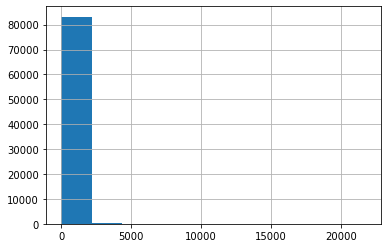

In [190]:
Data.LodgingRevenue.hist()

<AxesSubplot:>

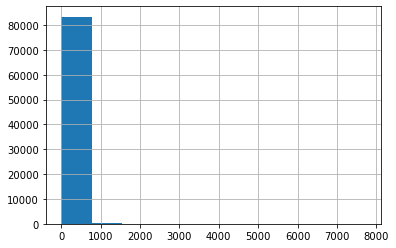

In [191]:
Data.OtherRevenue.hist()

Seems like we are free of negative revenues. However, there are many zero revenue instances. Let's explore our theory that instances are for all guests and not just booking customers. Let's look at what  the age of these zero revenues is. 

In [192]:
(wrong_ages['LodgingRevenue']<=0).value_counts()

False    20
True      5
Name: LodgingRevenue, dtype: int64

In [193]:
(wrong_ages['OtherRevenue']<=0).value_counts()

False    20
True      5
Name: OtherRevenue, dtype: int64

In [194]:
print(wrong_ages)

          ID  Age  DaysSinceCreation  LodgingRevenue  OtherRevenue
2053    2054  0.0               1034            0.00          0.00
2469    2470  0.0               1029            0.00          0.00
3282    3283  0.0               1015           79.00         25.50
5128    5129  0.0                981           93.30         14.00
6751    6752  0.0                953          450.00         18.00
8360    8361  0.0                927          126.00        109.00
8628    8629  0.0                923          414.60         34.00
9919    9920  0.0                903          138.93         29.50
10662  10663  0.0                891          126.00        113.00
10694  10695  0.0                891          128.00         57.50
10755  10756  0.0                891          128.00         55.00
14321  14322  0.0                837          128.00         53.00
14687  14688  0.0                832          330.00        131.00
15104  15105  0.0                827          240.00         6

In [195]:
missing_revenue = Data.loc[(Data['LodgingRevenue'] < 1) | (Data['OtherRevenue'] < 1)]

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DaysSinceCreation'}>,
        <AxesSubplot:title={'center':'AverageLeadTime'}>,
        <AxesSubplot:title={'center':'LodgingRevenue'}>],
       [<AxesSubplot:title={'center':'OtherRevenue'}>,
        <AxesSubplot:title={'center':'BookingsCanceled'}>,
        <AxesSubplot:title={'center':'BookingsNoShowed'}>,
        <AxesSubplot:title={'center':'BookingsCheckedIn'}>,
        <AxesSubplot:title={'center':'PersonsNights'}>],
       [<AxesSubplot:title={'center':'RoomNights'}>,
        <AxesSubplot:title={'center':'DaysSinceLastStay'}>,
        <AxesSubplot:title={'center':'DaysSinceFirstStay'}>,
        <AxesSubplot:title={'center':'SRHighFloor'}>,
        <AxesSubplot:title={'center':'SRLowFloor'}>],
       [<AxesSubplot:title={'center':'SRAccessibleRoom'}>,
        <AxesSubplot:title={'center':'SRMediumFloor'}>,
        <AxesSubplot:title={'center':'SRBathtu

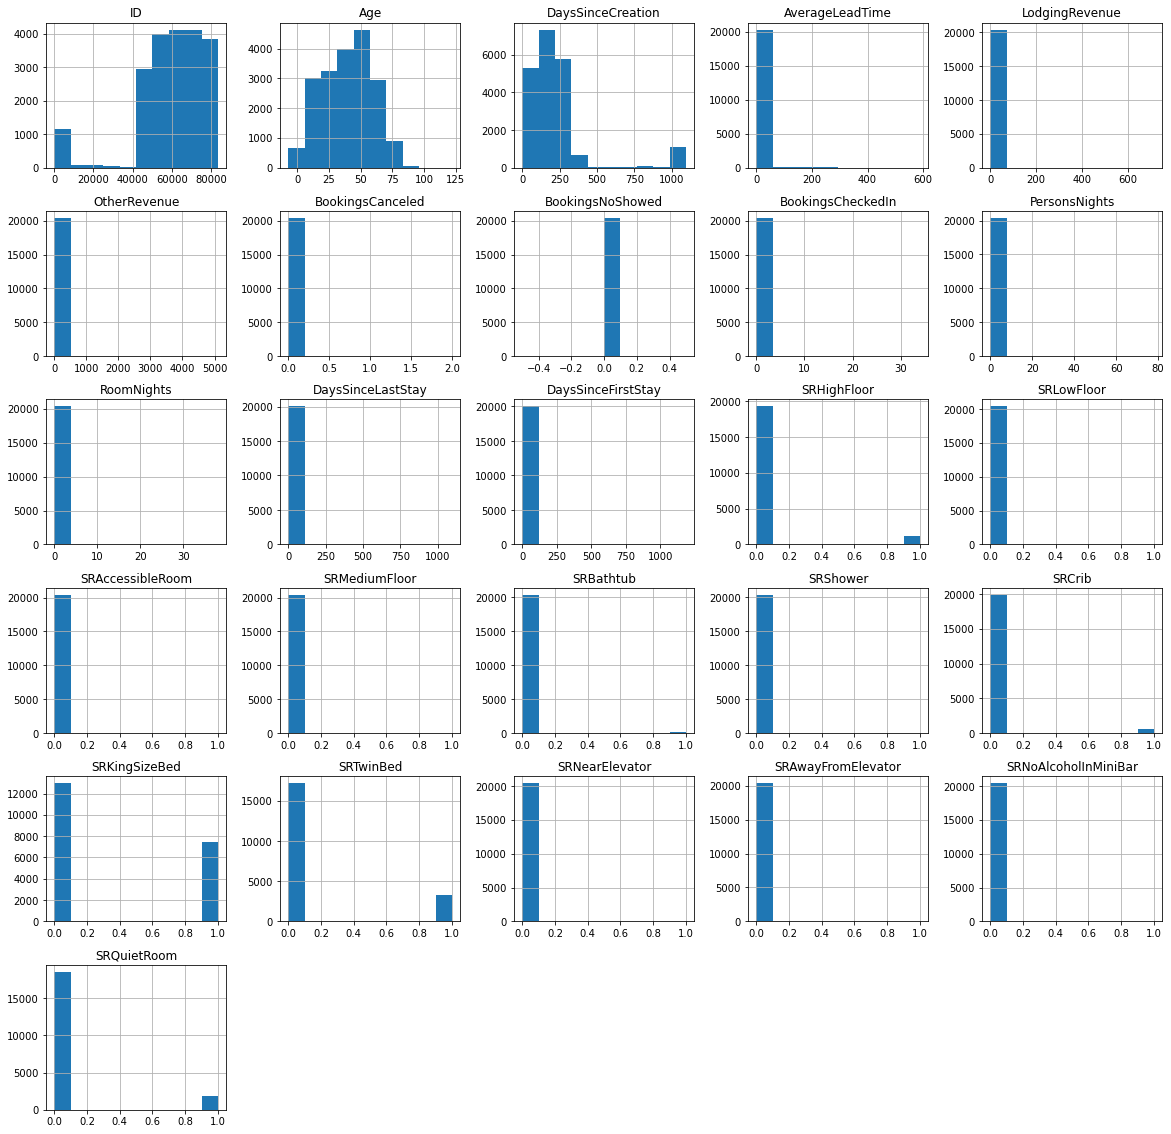

In [196]:
missing_revenue.hist(figsize=(20 , 20))

It is apparent and intuitive that if an instance shows zero LodingRevenue, it also always shows zero OtherRevenue

Not all instances where an age is 0 shows zero revenue. Does not explain for portion of the 20k rows with normal ages that show no revenue. 

Over 20k rows and 24% of instances have zero revenue information. Out of those, how many are cancellations or nosows? If a great many of those zero revenues are explained, it might be acceptable to leave it. However, we need to determine if the zero values will hinder our customer value predictions.

In [197]:
revenuefilter3 = ((Data['LodgingRevenue']<=0) & Data['BookingsCanceled']>0).value_counts()

print(revenuefilter3)

False    83578
True        12
dtype: int64


In [198]:
revenuefilter4 = ((Data['LodgingRevenue']<=0) & Data['BookingsNoShowed']>0).value_counts()

print(revenuefilter4)

False    83590
dtype: int64


In [199]:
revenuefilter5 = ((Data['LodgingRevenue']<=0) & Data['BookingsCheckedIn']>0).value_counts()
print(revenuefilter5)

False    83137
True       453
dtype: int64


From this quick check, this doesn't seem to be the case that the majority of these zero revenue instances are related to age, canceled bookings, noshows or checkins. We will need to do a closer analysis on this in the EDA to determine the correct way to deal with these zeros and possibly impute the zeros using supervised learning to predict the value. Perhaps this will help our clustering to know which customers have spent zero dollars? 

### Impute zero revenue values? Still undecided. Will come back to this.

#Random Forest is suggested and cited [here](https://www.frontiersin.org/articles/10.3389/fdata.2021.693674/full) and [here](https://medium.com/analytics-vidhya/smart-data-imputation-using-random-forest-58a9aedd557a)

#### Bookings, Nights, Rooms, Days

We saw earlier that each of these features is in the correct int datatype. Duplicates are likely and not an issue. No missing values, see below.

### Outliers quick check

Are there any other extreme values?

In [202]:
Data.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.388180,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.559938,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,96.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nothing that immediately stands out now that we've cleaned the Age feature. 

What other distribution considerations are we interested in for the EDA process besides revenues? 

I am beginning to consider cancelation prediciton or churn as an option for this project as well. 

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DaysSinceCreation'}>,
        <AxesSubplot:title={'center':'AverageLeadTime'}>,
        <AxesSubplot:title={'center':'LodgingRevenue'}>],
       [<AxesSubplot:title={'center':'OtherRevenue'}>,
        <AxesSubplot:title={'center':'BookingsCanceled'}>,
        <AxesSubplot:title={'center':'BookingsNoShowed'}>,
        <AxesSubplot:title={'center':'BookingsCheckedIn'}>,
        <AxesSubplot:title={'center':'PersonsNights'}>],
       [<AxesSubplot:title={'center':'RoomNights'}>,
        <AxesSubplot:title={'center':'DaysSinceLastStay'}>,
        <AxesSubplot:title={'center':'DaysSinceFirstStay'}>,
        <AxesSubplot:title={'center':'SRHighFloor'}>,
        <AxesSubplot:title={'center':'SRLowFloor'}>],
       [<AxesSubplot:title={'center':'SRAccessibleRoom'}>,
        <AxesSubplot:title={'center':'SRMediumFloor'}>,
        <AxesSubplot:title={'center':'SRBathtu

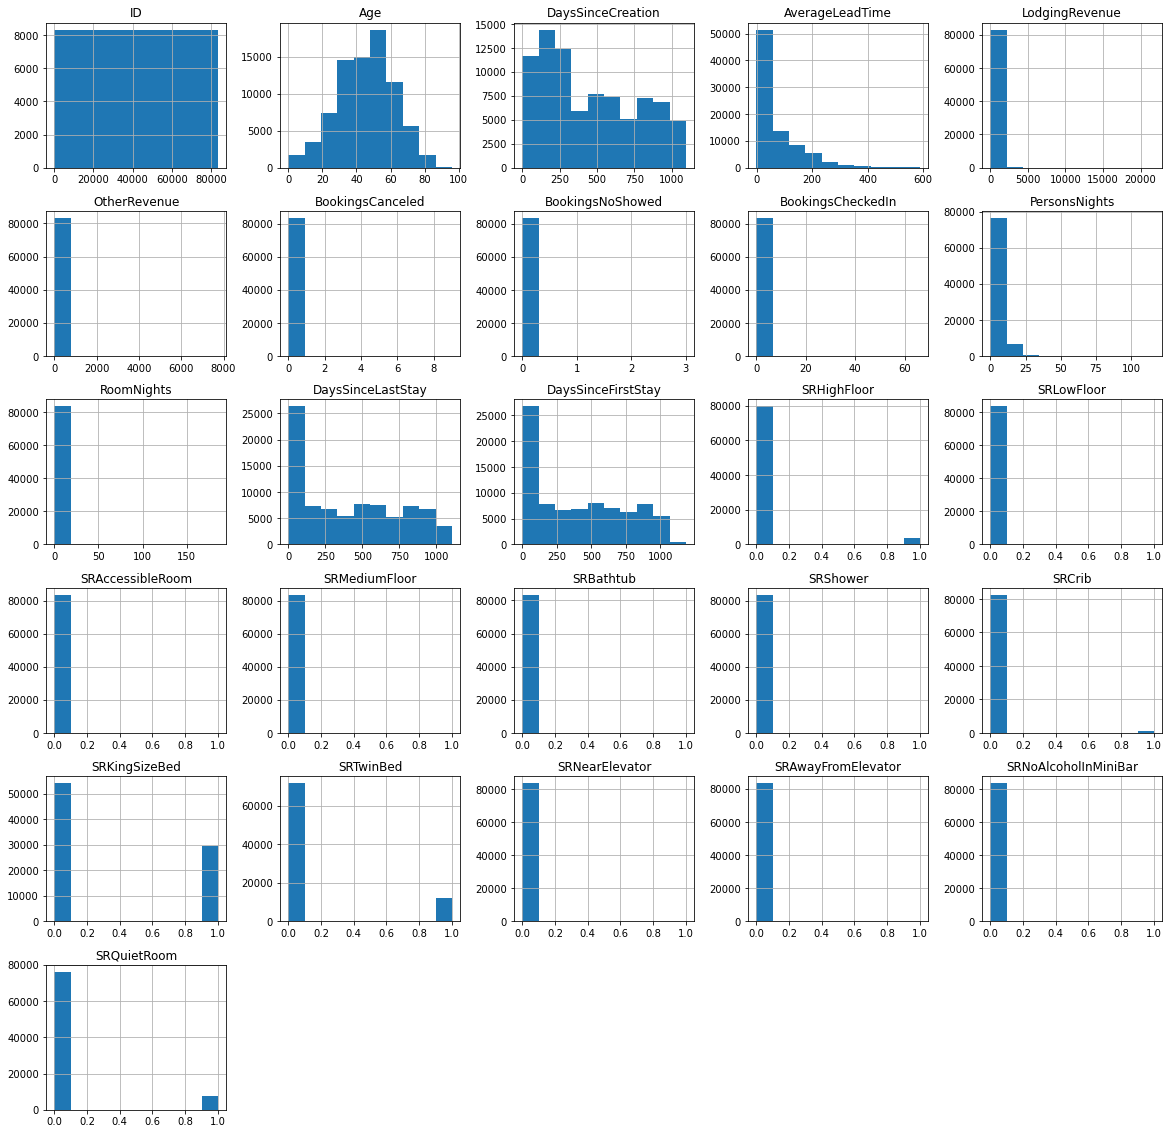

In [203]:
Data.hist(figsize=(20,20))

<AxesSubplot:xlabel='Age'>

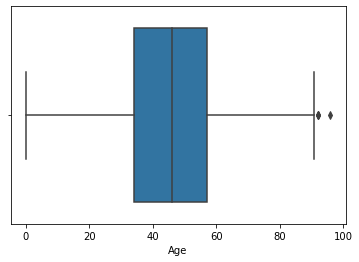

In [206]:
sns.boxplot(x=Data['Age'])

<AxesSubplot:xlabel='DaysSinceCreation'>

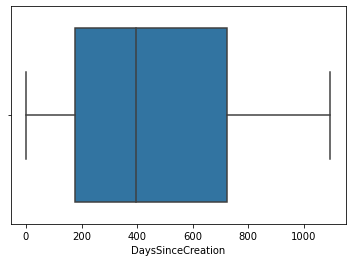

In [207]:
sns.boxplot(x=Data['DaysSinceCreation'])

<AxesSubplot:xlabel='AverageLeadTime'>

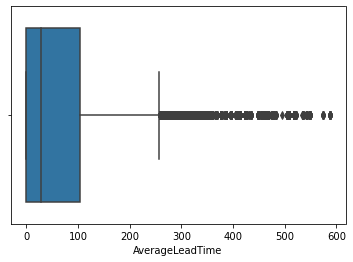

In [208]:
sns.boxplot(x=Data['AverageLeadTime'])

<AxesSubplot:xlabel='LodgingRevenue'>

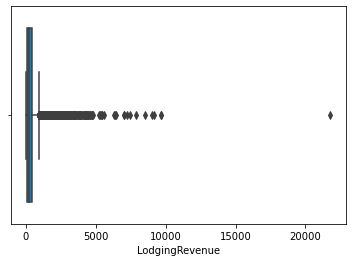

In [209]:
sns.boxplot(x=Data['LodgingRevenue'])

<AxesSubplot:xlabel='OtherRevenue'>

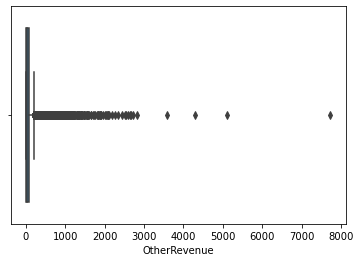

In [210]:
sns.boxplot(x=Data['OtherRevenue'])

<AxesSubplot:xlabel='BookingsCanceled'>

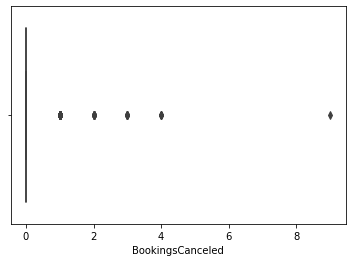

In [211]:
sns.boxplot(x=Data['BookingsCanceled'])

<AxesSubplot:xlabel='BookingsNoShowed'>

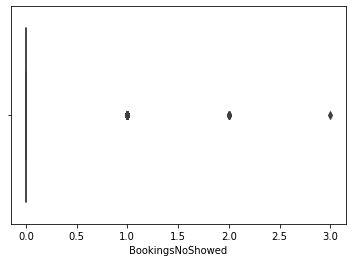

In [212]:
sns.boxplot(x=Data['BookingsNoShowed'])

<AxesSubplot:xlabel='BookingsCheckedIn'>

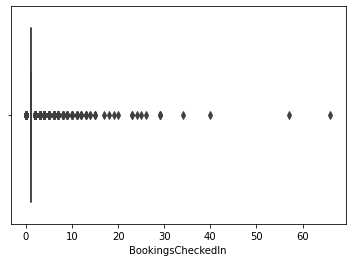

In [213]:
sns.boxplot(x=Data['BookingsCheckedIn'])

<AxesSubplot:xlabel='PersonsNights'>

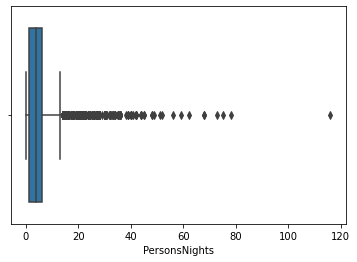

In [214]:
sns.boxplot(x=Data['PersonsNights'])

<AxesSubplot:xlabel='DaysSinceLastStay'>

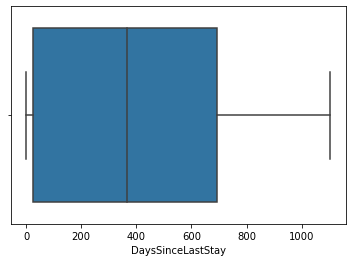

In [215]:
sns.boxplot(x=Data['DaysSinceLastStay'])

<AxesSubplot:xlabel='DaysSinceFirstStay'>

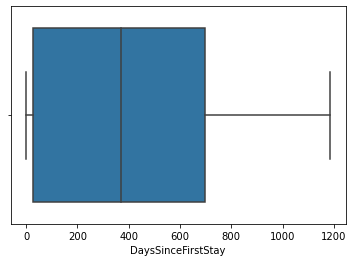

In [216]:
sns.boxplot(x=Data['DaysSinceFirstStay'])

<AxesSubplot:xlabel='RoomNights'>

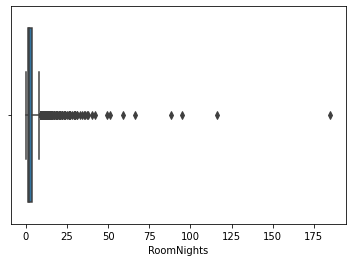

In [217]:
sns.boxplot(x=Data['RoomNights'])